In [1]:
##Spaceship Titanic'

In [2]:
"""
Import from libraries that will be used in the project

"""

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn import *

print('Carregou as bibliotecas...')

Carregou as bibliotecas...


In [3]:
##model validation

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('Loaded the libraries...')

Loaded the libraries...


In [4]:
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
print("Database loaded")

Database loaded


In [5]:
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
print("Test database loaded")

Test database loaded


In [6]:
PassengerId = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")['PassengerId']
##test_df
PassengerId

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [7]:
combine = [train_df, test_df]
print("Training and test database are loaded")

Training and test database are loaded


In [8]:
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('After', (8693, 14), (4277, 13), (8693, 14), (4277, 13))

In [9]:
##Check the columns

train_df.columns.values

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported'], dtype=object)

In [10]:
##Check the first records

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [11]:
## Correlation of columns to analyse

train_df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<AxesSubplot:>

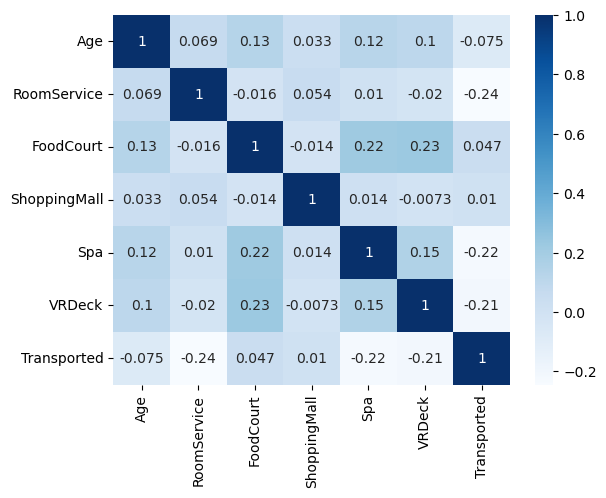

In [12]:
##Heatmap of columns correlation to analyse

sns.heatmap(train_df.corr(),cmap="Blues",annot=True)

In [13]:
##Total records

print("Total de: ",train_df['PassengerId'].count(), " registros")

Total de:  8693  registros


In [14]:
## Check for nulls in train_df base by column

train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [15]:
## Brings statistical information about the base

train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [16]:
## Median values by columns

train_df.median()[1:]
print('_'*40)
test_df.median()[1:]

________________________________________


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


CryoSleep        0.0
Age             26.0
VIP              0.0
RoomService      0.0
FoodCourt        0.0
ShoppingMall     0.0
Spa              0.0
VRDeck           0.0
dtype: float64

In [17]:
## Info values ( Column, Non-Null, Count, Dtype ) by columns

train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

In [18]:
## Ungroup family from code and add to dataframe to know how many families and correlate with survivors
## train_df

train_df['family_group'] = train_df['PassengerId'].str.split("_", n = 1, expand = True)[0]

In [19]:
## Ungroup family from code and add to dataframe to know how many families and correlate with survivors
## train_df

test_df['family_group'] = test_df['PassengerId'].str.split("_", n = 1, expand = True)[0]

In [20]:
## Join the modified bases in combine

combine = [train_df, test_df]
combine

[     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
 0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
 1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
 2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
 3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
 4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
 ...          ...        ...       ...       ...            ...   ...    ...   
 8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
 8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
 8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
 8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
 8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCourt  Shoppin

In [21]:
## Group the data by family group whether or not it was transported

train_df[['family_group','Transported']].groupby(['family_group'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,family_group,Transported
4257,6304,1.0
4609,6848,1.0
4607,6843,1.0
5264,7837,1.0
3352,4987,1.0
...,...,...
2655,3968,0.0
2657,3971,0.0
2663,3981,0.0
2665,3985,0.0


In [22]:
## Ungroup Cabin column to deck/num/side in train_df base

train_df['deck'] = train_df['Cabin'].str.split("/", n = 1, expand = True)[0]
train_df['num'] = train_df['Cabin'].str.split("/", n = 2, expand = True)[1]
train_df['side'] = train_df['Cabin'].str.split("/", n = 3, expand = True)[2]

In [23]:
## Ungroup Cabin column to deck/num/side in base test_df

test_df['deck'] = test_df['Cabin'].str.split("/", n = 1, expand = True)[0]
test_df['num'] = test_df['Cabin'].str.split("/", n = 2, expand = True)[1]
test_df['side'] = test_df['Cabin'].str.split("/", n = 3, expand = True)[2]

In [24]:
## Join the modified bases in combine

combine = [train_df, test_df]
combine

[     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
 0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
 1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
 2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
 3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
 4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
 ...          ...        ...       ...       ...            ...   ...    ...   
 8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
 8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
 8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
 8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
 8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCourt  Shoppin

In [25]:
## These are the cabins, Shopping Mall and Room Service where passengers were transported

cabin_transported = train_df[['Cabin','Transported']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Transported', ascending=False)
ShoppingMall_transported = train_df[['ShoppingMall','Transported']].groupby(['ShoppingMall'], as_index=False).mean().sort_values(by='Transported', ascending=False)
RoomService_transported = train_df[['RoomService','Transported']].groupby(['RoomService'], as_index=False).mean().sort_values(by='Transported', ascending=False)

In [26]:
## These are the cabins, Shopping Mall and Room Service that had no passengers transported

cabin_not_transported = pd.DataFrame()
ShoppingMall_not_transported = pd.DataFrame()
RoomService_not_transported =pd.DataFrame()

cabin_not_transported['cabin_not_transported'] = cabin_transported.loc[cabin_transported['Transported'] == 0].Cabin.unique()
ShoppingMall_not_transported['ShoppingMall_not_transported'] = ShoppingMall_transported.loc[ShoppingMall_transported['Transported'] == 0].ShoppingMall.unique()
RoomService_not_transported['RoomService_not_transported'] = RoomService_transported.loc[RoomService_transported['Transported'] == 0].RoomService.unique()


In [27]:
print(" Cabins in which people were not transported: ", np.count_nonzero(cabin_not_transported) ) 
print(" ShoppingMall_transported where people were not transported: ", np.count_nonzero(ShoppingMall_not_transported) )
print(" RoomService in which people were not transported: ", np.count_nonzero(RoomService_not_transported) )

 Cabins in which people were not transported:  3167
 ShoppingMall_transported where people were not transported:  499
 RoomService in which people were not transported:  851


In [28]:
cabin_not_transported

,cabin_not_transported
0,G/328/S
1,E/119/S
2,D/269/S
3,E/114/S
4,G/328/P
...,...
3162,F/797/P
3163,F/797/S
3164,F/1077/P
3165,F/1075/P


In [29]:
test_df['cabin_not_transported'] = 0
test_df['ShoppingMall_not_transported'] = 0
test_df['RoomService_not_transported'] = 0
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0013,G,3,S,0,0,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0018,F,4,S,0,0,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0019,C,0,S,0,0,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0021,C,1,S,0,0,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0023,F,5,S,0,0,0


In [30]:
## Alternative code below
# Find rows where the cabin is not transported
mask = train_df['Cabin'].isin(cabin_not_transported['cabin_not_transported'])

# Set the values of the 'cabin_not_transported' column to 1 where the mask is True, 0 otherwise
train_df.loc[mask, 'cabin_not_transported'] = 1
train_df.loc[~mask, 'cabin_not_transported'] = 0


In [31]:
## Alternative code below
# Find rows where the cabin is not transported
mask = test_df['Cabin'].isin(cabin_not_transported['cabin_not_transported'])

# Set the values of the 'cabin_not_transported' column to 1 where the mask is True, 0 otherwise
test_df.loc[mask, 'cabin_not_transported'] = 1
test_df.loc[~mask, 'cabin_not_transported'] = 0


In [32]:
## Alternative code below
# Find rows where the ShoppingMall is not transported
mask = train_df['ShoppingMall'].isin(ShoppingMall_not_transported['ShoppingMall_not_transported'])

# Set the values of the 'ShoppingMall_not_transported' column to 1 where the mask is True, 0 otherwise
train_df.loc[mask, 'ShoppingMall_not_transported'] = 1
train_df.loc[~mask, 'ShoppingMall_not_transported'] = 0

In [33]:
## Alternative code below
# Find rows where the ShoppingMall is not transported
mask = test_df['ShoppingMall'].isin(ShoppingMall_not_transported['ShoppingMall_not_transported'])

# Set the values of the 'ShoppingMall_not_transported' column to 1 where the mask is True, 0 otherwise
test_df.loc[mask, 'ShoppingMall_not_transported'] = 1
test_df.loc[~mask, 'ShoppingMall_not_transported'] = 0

In [34]:
## Alternative code below
# Find rows where the RoomService is not transported
mask = train_df['RoomService'].isin(RoomService_not_transported['RoomService_not_transported'])

# Set the values of the 'RoomService_not_transported' column to 1 where the mask is True, 0 otherwise
train_df.loc[mask, 'RoomService_not_transported'] = 1
train_df.loc[~mask, 'RoomService_not_transported'] = 0

In [35]:
## Alternative code below
# Find rows where the RoomService is not transported
mask = test_df['RoomService'].isin(RoomService_not_transported['RoomService_not_transported'])

# Set the values of the 'RoomService_not_transported' column to 1 where the mask is True, 0 otherwise
test_df.loc[mask, 'RoomService_not_transported'] = 1
test_df.loc[~mask, 'RoomService_not_transported'] = 0

In [36]:
## Join the modified bases in combine

combine = [train_df, test_df]
combine

[     PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
 0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
 1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
 2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
 3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
 4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
 ...          ...        ...       ...       ...            ...   ...    ...   
 8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
 8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
 8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
 8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
 8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCourt  Shoppin

In [37]:
## See if the column is populated correctly by checking the registration by sampling

train_df[train_df['Cabin'] == 'G/328/S']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported
1929,2063_01,Earth,True,G/328/S,PSO J318.5-22,38.0,False,0.0,0.0,0.0,...,0.0,Mistie Leonaldez,False,2063,G,328,S,1.0,0.0,0.0


In [38]:
## See if the column is populated correctly by checking the registration by sampling

train_df[train_df['ShoppingMall_not_transported'] == 1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,0003,A,0,S,1.0,1.0,0.0
13,0010_01,Earth,False,G/1/S,TRAPPIST-1e,48.0,False,719.0,1.0,65.0,...,24.0,Reney Baketton,False,0010,G,1,S,1.0,1.0,1.0
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,...,0.0,NaN,False,0022,D,0,P,1.0,1.0,1.0
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,...,401.0,Marina Leodger,False,0036,F,8,S,1.0,1.0,0.0
42,0043_01,Europa,False,B/3/P,TRAPPIST-1e,45.0,False,0.0,164.0,45.0,...,855.0,Ankalik Cylistrand,False,0043,B,3,P,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8639,9220_01,Earth,False,G/1496/P,TRAPPIST-1e,25.0,False,2.0,45.0,45.0,...,815.0,Branca Meyerthy,False,9220,G,1496,P,0.0,1.0,0.0
8660,9239_01,Mars,False,E/593/P,TRAPPIST-1e,14.0,False,2.0,0.0,918.0,...,0.0,Per Minen,False,9239,E,593,P,1.0,1.0,0.0
8661,9241_01,Mars,False,E/595/P,TRAPPIST-1e,30.0,False,699.0,0.0,600.0,...,0.0,Ants Fone,False,9241,E,595,P,1.0,1.0,0.0
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,...,0.0,Ties Apple,False,9257,F,1892,P,1.0,1.0,0.0


In [39]:
## See if the column is populated correctly by checking the registration by sampling

train_df[train_df['RoomService'] == 570.]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported
8241,8805_01,Earth,False,F/1815/P,PSO J318.5-22,37.0,False,570.0,0.0,7.0,...,0.0,Elindy Rasmussony,False,8805,F,1815,P,1.0,0.0,1.0


In [40]:
## Create column with people who were in these cabins that were not affected

cabin_cryosleeped = train_df[train_df['CryoSleep'] == True]['Cabin'].unique()

total_cabin_criosleeps = np.count_nonzero(cabin_cryosleeped)

print(" Cabines para CryoSleep: ", np.count_nonzero(cabin_cryosleeped))

 Cabines para CryoSleep:  2438


In [41]:
## Total cabins for cryosleeps

total_cabin = np.count_nonzero( train_df['Cabin'].unique() )

print("Total de cabines: ",total_cabin," - cabines para criosleeps: ",total_cabin_criosleeps," -  Percentual cabines criosleeps: ", (total_cabin_criosleeps * 100 / total_cabin)," %")

Total de cabines:  6561  - cabines para criosleeps:  2438  -  Percentual cabines criosleeps:  37.158969669257736  %


In [42]:
## Total cabins

total_cabin = np.count_nonzero( train_df['Cabin'].unique() )

print("Total de cabines: ",total_cabin," - cabines para criosleeps: ",total_cabin_criosleeps," -  Percentual cabines criosleeps: ", (total_cabin_criosleeps * 100 / total_cabin)," %")

Total de cabines:  6561  - cabines para criosleeps:  2438  -  Percentual cabines criosleeps:  37.158969669257736  %


In [43]:
##  Create grid with correlation comparisons between bank columns

##g = sns.PairGrid(train_df, hue="Transported")
##g.map_diag(sns.scatterplot)
##g.map_offdiag(sns.scatterplot)
##g.add_legend()

print("continua...")

continua...


In [44]:
## Premises:
## Some cabins were not transported
## Drop PassengerId, Name columns that have no information
## Family_group has no null values
## Spa, VRDeck, ShoppingMall, Vip have a low correlation with transported passengers (Really?).

In [45]:
## Numerical correlation between columns

train_df.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026,0.078638,0.040701,0.077030
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611,0.187215,0.179308,0.602793
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566,-0.081915,-0.047588,-0.061694
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141,-0.002450,0.253863,0.034587
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131,0.088210,0.026889,-0.007127
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075,0.085350,0.010933,-0.024853
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000,-0.798554,-0.313118,-0.405238
cabin_not_transported,0.078638,0.187215,-0.081915,-0.002450,0.088210,0.085350,-0.798554,1.000000,0.281235,0.348461
ShoppingMall_not_transported,0.040701,0.179308,-0.047588,0.253863,0.026889,0.010933,-0.313118,0.281235,1.000000,0.253488
RoomService_not_transported,0.077030,0.602793,-0.061694,0.034587,-0.007127,-0.024853,-0.405238,0.348461,0.253488,1.000000


In [46]:
## Convert columns from object to float

train_df['family_group'] = train_df['family_group'].str.replace(',','.').astype(float)
train_df['num'] = train_df['num'].str.replace(',','.').astype(float)

In [47]:
## Convert columns from object to float

test_df['family_group'] = test_df['family_group'].str.replace(',','.').astype(float)
test_df['num'] = test_df['num'].str.replace(',','.').astype(float)

In [48]:
## Let's check if there were passengers alone

groupby_family_group = train_df.groupby('family_group').count()['PassengerId']

print("Total de famílias: ",groupby_family_group.count(), " Percentual de grupos de pessoas sozinhas: ",( ( groupby_family_group.loc[groupby_family_group == 1].count() * 100 ) / groupby_family_group.count() )," %"  )

Total de famílias:  6217  Percentual de grupos de pessoas sozinhas:  77.28808106803925  %


In [49]:
##Complete the NAN in deck, num and side

train_df["deck"].fillna(0)
train_df["num"].fillna(0)
train_df["side"].fillna(0)

0       P
1       S
2       S
3       S
4       S
       ..
8688    P
8689    S
8690    S
8691    S
8692    S
Name: side, Length: 8693, dtype: object

In [50]:
##Complete the NAN in deck, num and side

test_df["deck"].fillna(0)
test_df["num"].fillna(0)
test_df["side"].fillna(0)

0       S
1       S
2       S
3       S
4       S
       ..
4272    S
4273    0
4274    P
4275    P
4276    S
Name: side, Length: 4277, dtype: object

In [51]:
##  View the HomePlanet column to see what values are contained

train_df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [52]:
## Create a list with the values that will be replaced and the values that will replace

HomePlanet_mapping = {"Europa":1,"Earth":2,"Mars":3}
HomePlanet_mapping

{'Europa': 1, 'Earth': 2, 'Mars': 3}

In [53]:
## Convert categorical / HomePlanet data to numeric in train_df

train_df = train_df.replace(HomePlanet_mapping)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported
0,0001_01,1.0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1.0,B,0.0,P,1.0,0.0,0.0
1,0002_01,2.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2.0,F,0.0,S,0.0,0.0,0.0
2,0003_01,1.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3.0,A,0.0,S,1.0,0.0,0.0
3,0003_02,1.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,3.0,A,0.0,S,1.0,1.0,0.0
4,0004_01,2.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,4.0,F,1.0,S,0.0,0.0,0.0


In [54]:
## Convert categorical / HomePlanet data to numeric in test_df

test_df = test_df.replace(HomePlanet_mapping)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported
0,0013_01,2.0,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13.0,G,3.0,S,0,0,0
1,0018_01,2.0,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18.0,F,4.0,S,0,0,0
2,0019_01,1.0,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19.0,C,0.0,S,0,0,0
3,0021_01,1.0,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21.0,C,1.0,S,0,0,0
4,0023_01,2.0,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23.0,F,5.0,S,0,0,0


In [55]:
## Join the modified bases in combine

combine = [train_df, test_df]
combine

[     PassengerId  HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
 0        0001_01         1.0     False     B/0/P    TRAPPIST-1e  39.0  False   
 1        0002_01         2.0     False     F/0/S    TRAPPIST-1e  24.0  False   
 2        0003_01         1.0     False     A/0/S    TRAPPIST-1e  58.0   True   
 3        0003_02         1.0     False     A/0/S    TRAPPIST-1e  33.0  False   
 4        0004_01         2.0     False     F/1/S    TRAPPIST-1e  16.0  False   
 ...          ...         ...       ...       ...            ...   ...    ...   
 8688     9276_01         1.0     False    A/98/P    55 Cancri e  41.0   True   
 8689     9278_01         2.0      True  G/1499/S  PSO J318.5-22  18.0  False   
 8690     9279_01         2.0     False  G/1500/S    TRAPPIST-1e  26.0  False   
 8691     9280_01         1.0     False   E/608/S    55 Cancri e  32.0  False   
 8692     9280_02         1.0     False   E/608/S    TRAPPIST-1e  44.0  False   
 
       RoomService  FoodCo

In [56]:
## Drop PassengerId and Name columns in test_df

##test_df = test_df.drop(['Name'], axis=1)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported
0,0001_01,1.0,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1.0,B,0.0,P,1.0,0.0,0.0
1,0002_01,2.0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2.0,F,0.0,S,0.0,0.0,0.0
2,0003_01,1.0,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3.0,A,0.0,S,1.0,0.0,0.0
3,0003_02,1.0,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,3.0,A,0.0,S,1.0,1.0,0.0
4,0004_01,2.0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,4.0,F,1.0,S,0.0,0.0,0.0


In [57]:
## Analyze the Destinations possibles

train_df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [58]:
## transform in int 0 / 1 boolean field to each value

train_df = pd.get_dummies(train_df, columns = ['Destination'])


In [59]:
##Analise the Destinations possibles

test_df['Destination'].unique()

array(['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22', nan], dtype=object)

In [60]:
## transform in int 0 / 1 boolean field to each value
test_df = pd.get_dummies(test_df, columns = ['Destination'])
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0013_01,2.0,True,G/3/S,27.0,False,0.0,0.0,0.0,0.0,...,13.0,G,3.0,S,0,0,0,0,0,1
1,0018_01,2.0,False,F/4/S,19.0,False,0.0,9.0,0.0,2823.0,...,18.0,F,4.0,S,0,0,0,0,0,1
2,0019_01,1.0,True,C/0/S,31.0,False,0.0,0.0,0.0,0.0,...,19.0,C,0.0,S,0,0,0,1,0,0
3,0021_01,1.0,False,C/1/S,38.0,False,0.0,6652.0,0.0,181.0,...,21.0,C,1.0,S,0,0,0,0,0,1
4,0023_01,2.0,False,F/5/S,20.0,False,10.0,0.0,635.0,0.0,...,23.0,F,5.0,S,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,2.0,True,G/1496/S,34.0,False,0.0,0.0,0.0,0.0,...,9266.0,G,1496.0,S,0,0,0,0,0,1
4273,9269_01,2.0,False,NaN,42.0,False,0.0,847.0,17.0,10.0,...,9269.0,NaN,NaN,NaN,0,0,0,0,0,1
4274,9271_01,3.0,True,D/296/P,NaN,False,0.0,0.0,0.0,0.0,...,9271.0,D,296.0,P,0,0,0,1,0,0
4275,9273_01,1.0,False,D/297/P,NaN,False,0.0,2680.0,0.0,0.0,...,9273.0,D,297.0,P,0,0,0,0,0,0


In [61]:
## Join the modified bases in combine

##combine = [train_df, test_df]
##combine

In [62]:
## Drop PassengerId and Name columns in train_df

train_df = train_df.drop(['PassengerId','Name'], axis=1)
train_df.head()

test_df = test_df.drop(['PassengerId'], axis=1)

##X_train = train_df
##X_train.drop("Transported", axis=1)
##X_train

In [63]:
## Filling NaN, null or etc values in train_df


train_df["CryoSleep"].fillna(False)
train_df["Age"].fillna(0)
train_df["VIP"].fillna(False)
train_df["HomePlanet"].fillna(0)

train_df["RoomService"].fillna( float( train_df["RoomService"].mean() ), inplace=True)
train_df["FoodCourt"].fillna( float( train_df["FoodCourt"].mean() ), inplace=True)
train_df["ShoppingMall"].fillna( float( train_df["ShoppingMall"].mean() ), inplace=True)
train_df["Spa"].fillna( float( train_df["Spa"].mean() ), inplace=True)
train_df["VRDeck"].fillna( float( train_df["VRDeck"].mean() ), inplace=True)
train_df = train_df.fillna(0)

In [64]:
HomePlanet_mapping = {"Europa":1,"Earth":2,"Mars":3, 'NAN':0}
HomePlanet_mapping

{'Europa': 1, 'Earth': 2, 'Mars': 3, 'NAN': 0}

In [65]:
## Create a list with the values that will be replaced and the values that will replace

Side_mapping = {"P":1,"S":2,"0":0}
Side_mapping

{'P': 1, 'S': 2, '0': 0}

In [66]:
## Create a list with the values that will be replaced and the values that will replace

Deck_mapping = {"B":1,"F":2,"A":3, 'G':4, 'E':5,'D':6,'C':7,'T':8,'0':0}
Deck_mapping

{'B': 1, 'F': 2, 'A': 3, 'G': 4, 'E': 5, 'D': 6, 'C': 7, 'T': 8, '0': 0}

In [67]:
## Convert categorical/Deck data to numeric in train_df

##train_df = train_df.replace(Deck_mapping)
train_df = train_df.replace(Deck_mapping)
train_df.head()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1.0,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,P,1.0,0.0,0.0,0,0,1
1,2.0,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,...,2.0,2,0.0,S,0.0,0.0,0.0,0,0,1
2,1.0,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,3.0,3,0.0,S,1.0,0.0,0.0,0,0,1
3,1.0,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,3.0,3,0.0,S,1.0,1.0,0.0,0,0,1
4,2.0,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,...,4.0,2,1.0,S,0.0,0.0,0.0,0,0,1


In [68]:
## Convert categorical/Deck data to numeric in test_df

##test_df = test_df.replace(Deck_mapping)
test_df = test_df.replace(Deck_mapping)
test_df.head()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,2.0,True,G/3/S,27.0,False,0.0,0.0,0.0,0.0,0.0,...,13.0,4.0,3.0,S,0,0,0,0,0,1
1,2.0,False,F/4/S,19.0,False,0.0,9.0,0.0,2823.0,0.0,...,18.0,2.0,4.0,S,0,0,0,0,0,1
2,1.0,True,C/0/S,31.0,False,0.0,0.0,0.0,0.0,0.0,...,19.0,7.0,0.0,S,0,0,0,1,0,0
3,1.0,False,C/1/S,38.0,False,0.0,6652.0,0.0,181.0,585.0,...,21.0,7.0,1.0,S,0,0,0,0,0,1
4,2.0,False,F/5/S,20.0,False,10.0,0.0,635.0,0.0,0.0,...,23.0,2.0,5.0,S,0,0,0,0,0,1


In [69]:
## Convert categorical/Deck data to numeric in train_df

##train_df = train_df.replace(Deck_mapping)
train_df = train_df.replace(Side_mapping)
train_df.head()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1.0,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,...,1.0,1,0.0,1,1.0,0.0,0.0,0,0,1
1,2.0,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,...,2.0,2,0.0,2,0.0,0.0,0.0,0,0,1
2,1.0,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,3.0,3,0.0,2,1.0,0.0,0.0,0,0,1
3,1.0,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,3.0,3,0.0,2,1.0,1.0,0.0,0,0,1
4,2.0,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,...,4.0,2,1.0,2,0.0,0.0,0.0,0,0,1


In [70]:
## Convert categorical/Deck data to numeric in test_df

##test_df = test_df.replace(Deck_mapping)
test_df = test_df.replace(Side_mapping)
test_df.head()

,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,2.0,True,G/3/S,27.0,False,0.0,0.0,0.0,0.0,0.0,...,13.0,4.0,3.0,2.0,0,0,0,0,0,1
1,2.0,False,F/4/S,19.0,False,0.0,9.0,0.0,2823.0,0.0,...,18.0,2.0,4.0,2.0,0,0,0,0,0,1
2,1.0,True,C/0/S,31.0,False,0.0,0.0,0.0,0.0,0.0,...,19.0,7.0,0.0,2.0,0,0,0,1,0,0
3,1.0,False,C/1/S,38.0,False,0.0,6652.0,0.0,181.0,585.0,...,21.0,7.0,1.0,2.0,0,0,0,0,0,1
4,2.0,False,F/5/S,20.0,False,10.0,0.0,635.0,0.0,0.0,...,23.0,2.0,5.0,2.0,0,0,0,0,0,1


In [71]:
##train_df = train_df.drop("Name", axis=1)

##train_df = train_df.drop("Destination", axis=1)
train_df = train_df.drop("Cabin", axis=1)
##train_df = train_df.drop("deck", axis=1)
##train_df = train_df.drop("side", axis=1)
train_df

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1.0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1.0,1,0.0,1,1.0,0.0,0.0,0,0,1
1,2.0,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,2.0,2,0.0,2,0.0,0.0,0.0,0,0,1
2,1.0,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,3.0,3,0.0,2,1.0,0.0,0.0,0,0,1
3,1.0,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,3.0,3,0.0,2,1.0,1.0,0.0,0,0,1
4,2.0,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,4.0,2,1.0,2,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,9276.0,3,98.0,1,1.0,0.0,0.0,1,0,0
8689,2.0,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,9278.0,4,1499.0,2,1.0,0.0,0.0,0,1,0
8690,2.0,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,9279.0,4,1500.0,2,0.0,0.0,0.0,0,0,1
8691,1.0,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,9280.0,5,608.0,2,0.0,0.0,0.0,1,0,0


In [72]:
##  Filling NaN, null or etc values in test_df

test_df["CryoSleep"].fillna(False)
test_df["Age"].fillna(0)
test_df["VIP"].fillna(False)
test_df["HomePlanet"].fillna(0)

test_df["RoomService"].fillna( float( test_df["RoomService"].mean() ), inplace=True)
test_df["FoodCourt"].fillna( float( test_df["FoodCourt"].mean() ), inplace=True)
test_df["ShoppingMall"].fillna( float( test_df["ShoppingMall"].mean() ), inplace=True)
test_df["Spa"].fillna( float( test_df["Spa"].mean() ), inplace=True)
test_df["VRDeck"].fillna( float( test_df["VRDeck"].mean() ), inplace=True)
test_df = test_df.fillna(0)

In [73]:
test_df = test_df.drop("Name", axis=1)
##test_df = test_df.drop("Destination", axis=1)
test_df = test_df.drop("Cabin", axis=1)
##test_df = test_df.drop("deck", axis=1)
##test_df = test_df.drop("side", axis=1)
test_df

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,family_group,deck,num,side,cabin_not_transported,ShoppingMall_not_transported,RoomService_not_transported,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,2.0,True,27.0,False,0.0,0.0,0.0,0.0,0.0,13.0,4.0,3.0,2.0,0,0,0,0,0,1
1,2.0,False,19.0,False,0.0,9.0,0.0,2823.0,0.0,18.0,2.0,4.0,2.0,0,0,0,0,0,1
2,1.0,True,31.0,False,0.0,0.0,0.0,0.0,0.0,19.0,7.0,0.0,2.0,0,0,0,1,0,0
3,1.0,False,38.0,False,0.0,6652.0,0.0,181.0,585.0,21.0,7.0,1.0,2.0,0,0,0,0,0,1
4,2.0,False,20.0,False,10.0,0.0,635.0,0.0,0.0,23.0,2.0,5.0,2.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.0,True,34.0,False,0.0,0.0,0.0,0.0,0.0,9266.0,4.0,1496.0,2.0,0,0,0,0,0,1
4273,2.0,False,42.0,False,0.0,847.0,17.0,10.0,144.0,9269.0,0.0,0.0,0.0,0,0,0,0,0,1
4274,3.0,True,0.0,False,0.0,0.0,0.0,0.0,0.0,9271.0,6.0,296.0,1.0,0,0,0,1,0,0
4275,1.0,False,0.0,False,0.0,2680.0,0.0,0.0,523.0,9273.0,6.0,297.0,1.0,0,0,0,0,0,0


In [74]:
## Convert CryoSleep and VIP Columns to Numeric

train_df['CryoSleep'] = train_df['CryoSleep'].astype(int)
train_df['VIP'] = train_df['VIP'].astype(int)

test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
test_df['VIP'] = test_df['VIP'].astype(int)

In [75]:
## Transform boolean variable True/False into 1/0

train_df['Transported'] = train_df['Transported'].astype(int)

In [76]:
##

Y = train_df['Transported']
X = train_df.drop('Transported', axis=1)

In [77]:
train_df = train_df.drop("Transported", axis=1)

In [78]:
## Split train and test database

X_train_split, X_valid, Y_train_split, Y_valid = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=0)
print(" train_test_split feito")
Y_train_split

 train_test_split feito


7289    0
2709    1
6803    0
3731    1
6333    0
       ..
4373    1
7891    0
4859    0
3264    0
2732    0
Name: Transported, Length: 6085, dtype: int64

In [79]:
X_test = test_df

In [80]:

X_test = X_test

submission = 1000

In [81]:
## Logistic regression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train_split, Y_train_split)
Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train_split, Y_train_split) * 100, 2)

acc_log

94.89

In [82]:
## Transform boolean variable True/False into 1/0

y_valid = Y_valid .astype(int)

In [83]:
## Testing MAE in LogisticRegression


print("MAE (Your approach):")
mae_acc_log = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_acc_log ):
    submission = acc_log
    sample_Y_pred = Y_pred

mae_acc_log

MAE (Your approach):


0.49348159509202455

In [84]:
##
svc = SVC()
svc.fit(X_train_split, Y_train_split)
Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train_split, Y_train_split) * 100, 2)

acc_svc

77.9

In [85]:
## Testing MAE in SVC


print("MAE (Your approach):")
mae_acc_svc = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_acc_svc ):
    submission = mae_acc_svc
    sample_Y_pred = Y_pred

mae_acc_svc

MAE (Your approach):


0.48849693251533743

In [86]:
##
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_split, Y_train_split)
Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train_split, Y_train_split) * 100, 2)

acc_knn

85.57

In [87]:
## Testing MAE in KNeighborsClassifier


print("MAE (Your approach):")
mae_acc_knn = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_acc_knn ):
    submission = mae_acc_knn
    sample_Y_pred = Y_pred

mae_acc_knn

MAE (Your approach):


0.48964723926380366

In [88]:
##
gaussian = GaussianNB()
gaussian.fit(X_train_split, Y_train_split)
Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train_split, Y_train_split) * 100, 2)

acc_gaussian

94.17

In [89]:
## Testing MAE on GaussianNB


print("MAE (Your approach):")
mae_acc_gaussian = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_acc_gaussian ):
    submission = mae_acc_gaussian
    sample_Y_pred = Y_pred

mae_acc_gaussian

MAE (Your approach):


0.5023006134969326

In [90]:
##

perceptron = Perceptron()
perceptron.fit(X_train_split, Y_train_split)
Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train_split, Y_train_split) * 100, 2)

acc_perceptron

68.4

In [91]:
## Testing MAE on Perceptron


print("MAE (Your approach):")
mae_acc_perceptron = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_acc_perceptron ):
    submission = mae_acc_perceptron
    sample_Y_pred = Y_pred

mae_acc_perceptron

MAE (Your approach):


0.4965490797546012

In [92]:
##
linear_svc = LinearSVC(max_iter=100000)
linear_svc.fit(X_train_split, Y_train_split)
Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train_split, Y_train_split) * 100, 2)

acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


59.9

In [93]:
## Testing MAE on LinearSVC


print("MAE (Your approach):")
mae_acc_linear_svc = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_acc_linear_svc ):
    submission = mae_acc_linear_svc
    sample_Y_pred = Y_pred

mae_acc_linear_svc

MAE (Your approach):


0.4938650306748466

In [94]:
##
sgd = SGDClassifier()
sgd.fit(X_train_split, Y_train_split)
Y_pred = sgd.predict(X_test)

acc_sgd = round(sgd.score(X_train_split, Y_train_split) * 100, 2)

acc_sgd

53.57

In [95]:
## Testing MAE on SGDClassifier


print("MAE (Your approach):")
mae_acc_sgd = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_acc_sgd ):
    submission = mae_acc_sgd
    sample_Y_pred = Y_pred

mae_acc_sgd

MAE (Your approach):


0.49578220858895705

In [96]:
##
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_split, Y_train_split)
Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train_split, Y_train_split) * 100, 2)

acc_decision_tree

100.0

In [97]:
## Testing MAE on decision_tree


print("MAE (Your approach):")
mae_acc_decision_tree = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_acc_decision_tree ):
    submission = mae_acc_decision_tree
    sample_Y_pred = Y_pred

mae_acc_decision_tree

MAE (Your approach):


0.4946319018404908

In [98]:
##
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_split, Y_train_split)
Y_pred = random_forest.predict(X_test)

random_forest.score(X_train_split, Y_train_split)
acc_random_forest = round(random_forest.score(X_train_split, Y_train_split) * 100, 2)

acc_random_forest

100.0

In [99]:
## Testing MAE on random_forest


print("MAE (Your approach):")
mae_acc_random_forest = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_acc_random_forest ):
    submission = mae_acc_random_forest
    sample_Y_pred = Y_pred

mae_acc_random_forest

MAE (Your approach):


0.5007668711656442

In [100]:

lgbm_Classifier = LGBMClassifier(n_estimators=100)
lgbm_Classifier.fit(X_train_split, Y_train_split)
Y_pred = lgbm_Classifier.predict(X_test)


lgbm_Classifier.score(X_train_split, Y_train_split)
lgbm_Classifier = round(lgbm_Classifier.score(X_train_split, Y_train_split) * 100, 2)

lgbm_Classifier

98.55

In [101]:
## Testando MAE em lgbm_Classifier


print("MAE (Your approach):")
mae_lgbm_Classifier = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_lgbm_Classifier ):
    submission = mae_lgbm_Classifier
    sample_Y_pred = Y_pred

mae_lgbm_Classifier

MAE (Your approach):


0.49846625766871167

In [102]:
## Training in CatBoostClassifier
catboost_classifier = CatBoostClassifier(iterations=2,learning_rate=1,depth=2)
catboost_classifier.fit(X_train_split, Y_train_split)
Y_pred = catboost_classifier.predict(X_test)


catboost_classifier.score(X_train_split, Y_train_split)
catboost_classifier = round(catboost_classifier.score(X_train_split, Y_train_split) * 100, 2)

catboost_classifier

0:	learn: 0.2965469	total: 57.9ms	remaining: 57.9ms
1:	learn: 0.2498396	total: 59.1ms	remaining: 0us


93.26

In [103]:
## Testing MAE in CatBoostClassifier


print("MAE (Your approach):")
mae_catboost_classifier = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_catboost_classifier ):
    submission = mae_catboost_classifier
    sample_Y_pred = Y_pred

mae_catboost_classifier

MAE (Your approach):


0.48849693251533743

In [104]:
## 
xgbboost_classifier = XGBClassifier(learning_rate=1,max_depth=2)
xgbboost_classifier.fit(X_train_split, Y_train_split)
Y_pred = xgbboost_classifier.predict(X_test)


xgbboost_classifier.score(X_train_split, Y_train_split)
xgbboost_classifier = round(xgbboost_classifier.score(X_train_split, Y_train_split) * 100, 2)

xgbboost_classifier

97.17

In [105]:
## Testing MAE in xgbboost_classifier


print("MAE (Your approach):")
mae_xgbboost_classifier = mean_absolute_error(y_valid, Y_pred[:2608] )

if( submission > mae_xgbboost_classifier ):
    submission = mae_xgbboost_classifier
    sample_Y_pred = Y_pred

mae_xgbboost_classifier

MAE (Your approach):


0.4988496932515337

In [106]:
## Final table with algorithms, score and absolute mean error
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','LGBM Classifier','Cat Boost Classifier','XGBoost Classifier'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,lgbm_Classifier,
              catboost_classifier,xgbboost_classifier],
'mae' : [mae_acc_svc,mae_acc_knn,mae_acc_log,
         mae_acc_random_forest,mae_acc_gaussian,mae_acc_perceptron,
         mae_acc_sgd,mae_acc_linear_svc,mae_acc_decision_tree,
         mae_lgbm_Classifier,mae_catboost_classifier,mae_xgbboost_classifier]})
models.sort_values(by='Score', ascending=False)

,Model,Score,mae
3,Random Forest,100.00,0.500767
8,Decision Tree,100.00,0.494632
9,LGBM Classifier,98.55,0.498466
11,XGBoost Classifier,97.17,0.498850
2,Logistic Regression,94.89,0.493482
4,Naive Bayes,94.17,0.502301
10,Cat Boost Classifier,93.26,0.488497
1,KNN,85.57,0.489647
0,Support Vector Machines,77.90,0.488497
5,Perceptron,68.40,0.496549


In [107]:
## MAE with the best result among the models
print(" Mae: ", submission)

 Mae:  0.48849693251533743


In [108]:
##Y_pred

##sample_Y_pred = sample_Y_pred.replace({"0":False,"1":True})

sample_Y_pred = sample_Y_pred.astype(np.bool)
sample_Y_pred

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


array([ True, False,  True, ...,  True,  True,  True])

In [109]:
## Submit notebooks to the challenge

submission_final = pd.DataFrame({
        "PassengerId": PassengerId,
        "Transported": sample_Y_pred
    })
submission_final.to_csv('submission.csv', index=False)

print(" Arquivo submission.csv pronto ")

 Arquivo submission.csv pronto 
